1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
PATH = "TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df = df.drop(columns=["Unnamed: 0"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [5]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [6]:
# Check Missing values
df[categorical_cols].isnull().sum()

Employment Type        0
GraduateOrNot          0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

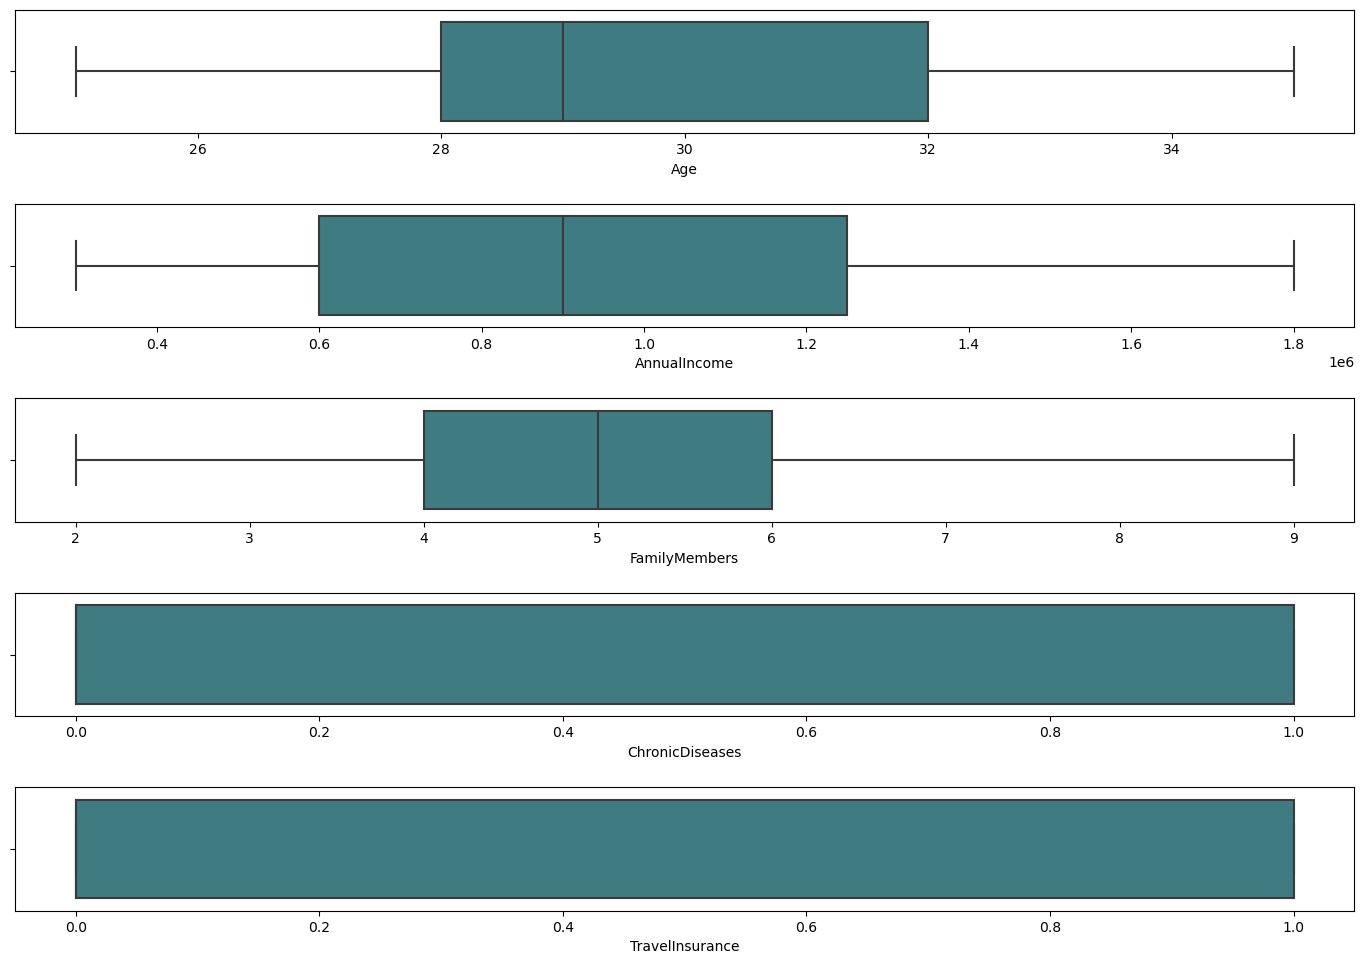

In [7]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

## Data Analysis

In [8]:
# Data analysis
# Todo: analyze your data here

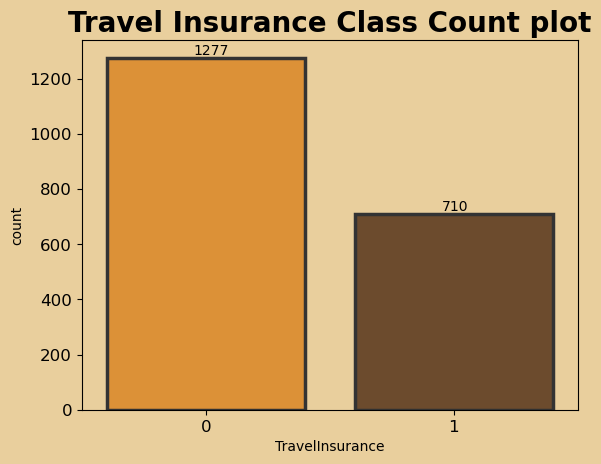

In [9]:
plt.figure(facecolor='#E9CF9D')
ax = sns.countplot(data=df, x='TravelInsurance', edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10)) for p in ax.patches]
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.title('Travel Insurance Class Count plot', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)
plt.show()

Text(0.5, 1.0, 'Count plot 2 feature of TravelInsurance with Employment Type')

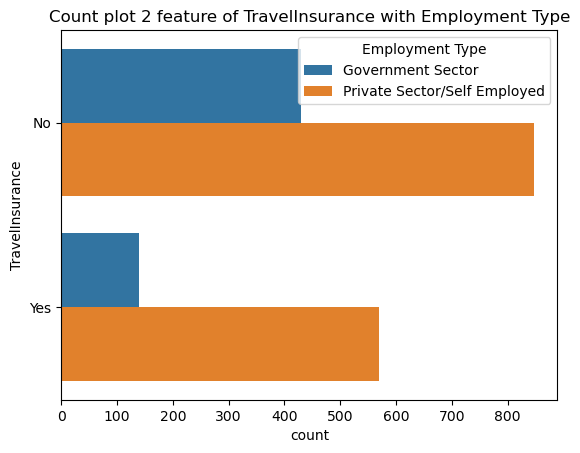

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
label = ['No','Yes']
yr=sns.countplot(y="TravelInsurance", data=df, hue = 'Employment Type')
yr.set_yticklabels(label,rotation = 0)
plt.title('Count plot 2 feature of TravelInsurance with Employment Type')



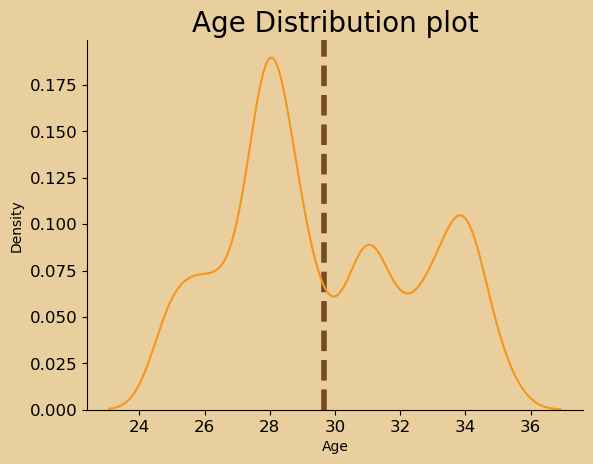

In [11]:
plt.figure(facecolor='#E9CF9D')
ax = sns.kdeplot(df['Age'], color='lightgray')
ax.set_facecolor('#E9CF9D')
ax.lines[0].set_color('#F7941C')
plt.axvline(df['Age'].mean(), linestyle='--', lw=4, zorder=1, color='#764A23')
plt.annotate(f' Average Age', (44, 0.008), fontsize=15,color='#764A23')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Age Distribution plot', fontsize=20)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Age')
plt.show()

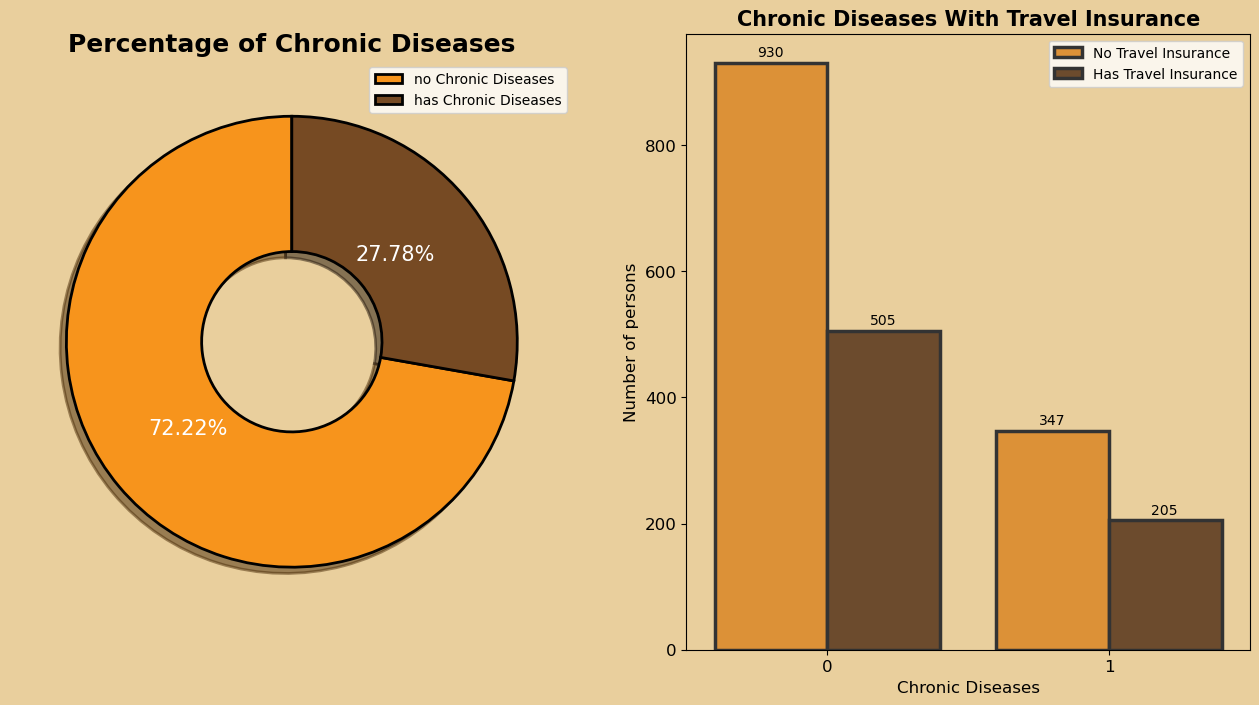

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
labels = ['no Chronic Diseases','has Chronic Diseases']
axs[0].pie(df["ChronicDiseases"].value_counts(),autopct='%1.2f%%',labels=labels, radius =1, 
           colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                         'linewidth': 2,
                         'antialiased': True,
                         "width":0.6}, textprops = {"fontsize":15, "color":"white"})
axs[0].set_title("Percentage of Chronic Diseases",fontsize=18,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].legend()
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1] = sns.countplot(x='ChronicDiseases', data=df, hue =df['TravelInsurance'], edgecolor='0.2', lw=2.5,  
                       palette=["#F7941C", "#764A23"])
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10)) for p in axs[1].patches]
axs[1].set_title("Chronic Diseases With Travel Insurance",fontsize=15,fontweight="bold")
axs[1].set_xlabel('Chronic Diseases',fontsize=12)
axs[1].set_ylabel('Number of persons',fontsize=12)
axs[1].legend(['No Travel Insurance','Has Travel Insurance'])
axs[1].set_facecolor('#E9CF9D')
axs[1].tick_params(axis='both', which='major', labelsize=12)
plt.show()

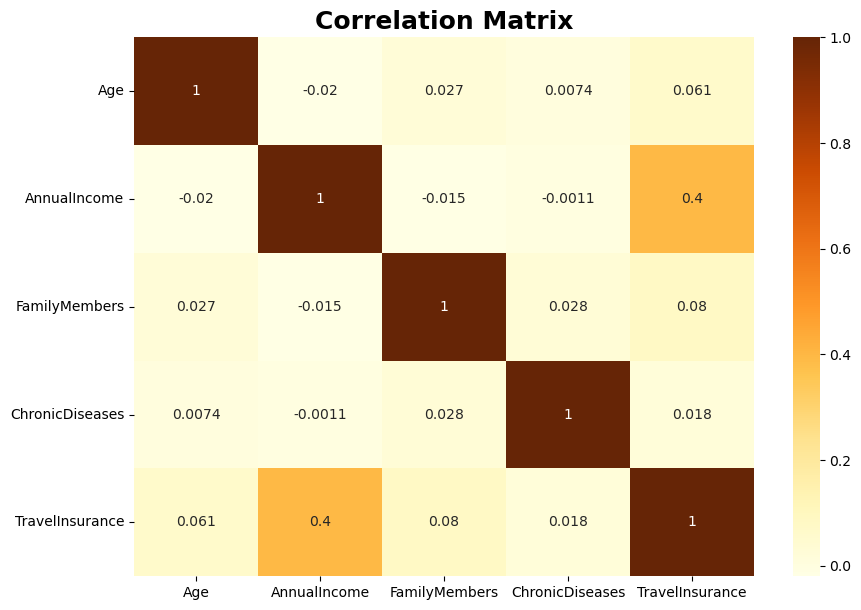

In [13]:
plt.figure(figsize=(10,7))
corrmat = df.corr()
colormap=sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)
plt.title('Correlation Matrix', fontsize=18, fontweight="bold")
plt.yticks(rotation=0)
plt.show() # Show heatmap after normalized data

## Preprocessing

In [14]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()
    return df

In [15]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [16]:
for col in df.columns:
    if (df.dtypes[col]=='O'):
        print(df[col].value_counts())

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


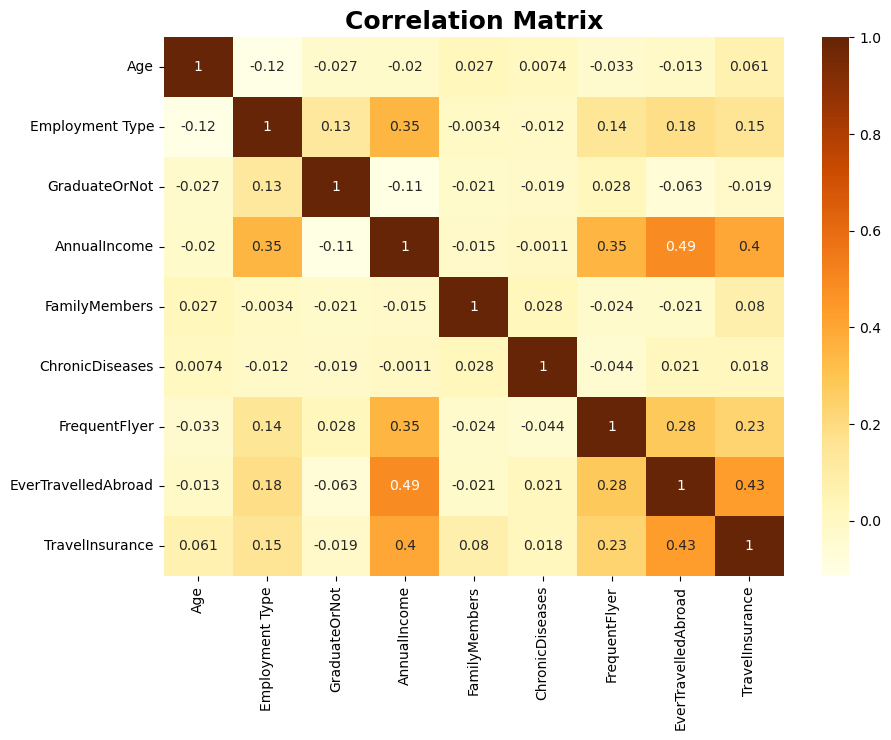

In [17]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    # Todo: normalize data into numerical data
    for col in df.columns: #tự động hóa cho mỗi cột dữ liệu được chuyển sang category
        if(df.dtypes[col]=='O'):  #lý do sử dụng dòng for là bởi vì khi những dữ liệu thực tế thì sẽ có khá là nhiều những cột cần phải chuyển sang category 
            if len(df[col].unique()) == 2:
                df[col] = df[col].apply(lambda x: 0 if x==df[col][0] else 1)
            elif len(df[col].unique()) > 2:
                df[col] = df[col].apply(lambda x: 0 if x==df[col][0] else 1 if x==df[col][1] else 2)
    df = df.copy()
    return df

df = apply_feature_engineering(df)
plt.figure(figsize=(10,7))
corrmat = df.corr()
colormap=sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)
plt.title('Correlation Matrix', fontsize=18, fontweight="bold")
plt.yticks(rotation=0)
plt.show() # Show heatmap after normalized data

In [18]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,0,400000,6,1,0,0,0
1,31,1,0,1250000,7,0,0,0,0
2,34,1,0,500000,4,1,0,0,1
3,28,1,0,700000,3,1,0,0,0
4,28,1,0,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,0,1500000,4,0,1,1,1
1983,28,1,0,1750000,5,1,0,1,0
1984,28,1,0,1150000,6,1,0,0,0
1985,34,1,0,1000000,6,0,1,1,1


In [19]:
for col in df.columns:
    print(df[col].value_counts())
    #Đã đổi sang numeric thành công

28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64
1    1417
0     570
Name: Employment Type, dtype: int64
0    1692
1     295
Name: GraduateOrNot, dtype: int64
800000     153
500000     143
1400000    130
1200000    112
1100000    107
600000      98
700000      95
1300000     91
300000      88
1500000     82
1050000     82
550000      81
1150000     79
900000      72
1250000     71
750000      65
400000      65
1000000     60
350000      55
850000      55
1350000     43
1700000     37
1450000     31
650000      30
950000      21
1750000     15
450000      15
1550000      5
1800000      4
1650000      2
Name: AnnualIncome, dtype: int64
4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64
0    1435
1     552
Name: ChronicDiseases, dtype: int64
0    1570
1     417
Name: FrequentFlyer, dtype: int64
0    1607
1     380
Name: EverTravelledAbroad, dtype: int

In [20]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('TravelInsurance', axis=1, inplace=False).values # Todo: Select features
    y = df['TravelInsurance'] # Todo: Select label
    y = np.array(y)
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [21]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 80
TRAIN_SIZE = 0.9

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import CategoricalNB
# Define a Standard Scaler to normalize inputs
pca = PCA()
# set the tolerance to a large value to make the example faster
gau_nb = GaussianNB()
pipe = Pipeline(steps=[("pca", pca), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(-4, -9, num=100)
param_grid = {
    "pca__n_components": [3, 4, 5, 6, 10],
    'gau_nb__var_smoothing': var_smoothing_values
    }

search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=2)
search.fit(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.517):
{'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 3}


In [23]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_absolute_error
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(PCA(n_components = 3 ),GaussianNB(var_smoothing = 0.0001))
    # Todo: fit your model with X, y
    model.fit(X,y)
    # Todo: fit your model with X, y

    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred))
    print("Recall: ", recall_score(y_true , y_pred ))
    print("F1: ", f1_score(y_true , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred ))
    print("classification_report: \n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = confusion_matrix(y_true , y_pred )
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

mean absolute error of linear model on train set  0.2494407158836689
mean absolute error of linear model on test set  0.21608040201005024


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(testX)  
calculate_performance(testY, y_pred)

Accuracy:  0.7839195979899497
Precision:  0.7674418604651163
Recall:  0.5
F1:  0.6055045871559633
Confusion matrix: 
 [[123  10]
 [ 33  33]]
classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       133
           1       0.77      0.50      0.61        66

    accuracy                           0.78       199
   macro avg       0.78      0.71      0.73       199
weighted avg       0.78      0.78      0.77       199



array([[123,  10],
       [ 33,  33]], dtype=int64)

In [25]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    conf_matrix = confusion_matrix(y_true=testY, y_pred=pred)

    vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    vis.plot()
    plt.show()
    return "7.confusion_matrix, lý do vì có thể trực quan hóa dạng bảng của nhãn true và so với lại nhãn pred, làm tăng thêm khả năng nhìn nhận vấn đề nhanh chóng và chính xác hơn của người làm dữ liệu.lớp tích cực đúng (TP) biểu thị rằng có bao nhiêu nhãn YES được dự đoán chính xác. lớp phủ định đúng TN biểu thị cho biết có bao nhiêu mẫu NO được dự đoán chính xác, giúp nhìn thấy vấn đề sâu hơn trong mô hình và các vấn đề thực tiễn." \
           "Other conclusion: em chọn thuật toán giảm chiều PCA: để giảm lại các số cột mà vẫn giữa lại các đặc trưng chính, nhằm mục đích dễ dàng cho các bài toán phân loại bởi vì nhiều đặc trưng sẽ bị đè lên nhau dễ làm sai lệch, nên thay vì để lại tất cả các đặc trưng nên em sẽ giảm xuống n_components = 5.  Tiếp theo em chọn thuật toán GaussianNB với parameters là var_smoothing và được Gridsearch chọn 0.0001 "

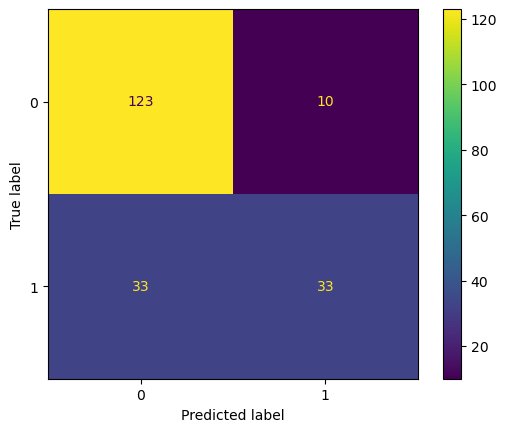

'7.confusion_matrix, lý do vì có thể trực quan hóa dạng bảng của nhãn true và so với lại nhãn pred, làm tăng thêm khả năng nhìn nhận vấn đề nhanh chóng và chính xác hơn của người làm dữ liệu.lớp tích cực đúng (TP) biểu thị rằng có bao nhiêu nhãn YES được dự đoán chính xác. lớp phủ định đúng TN biểu thị cho biết có bao nhiêu mẫu NO được dự đoán chính xác, giúp nhìn thấy vấn đề sâu hơn trong mô hình và các vấn đề thực tiễn.Other conclusion: em chọn thuật toán giảm chiều PCA: để giảm lại các số cột mà vẫn giữa lại các đặc trưng chính, nhằm mục đích dễ dàng cho các bài toán phân loại bởi vì nhiều đặc trưng sẽ bị đè lên nhau dễ làm sai lệch, nên thay vì để lại tất cả các đặc trưng nên em sẽ giảm xuống n_components = 5.  Tiếp theo em chọn thuật toán GaussianNB với parameters là var_smoothing và được Gridsearch chọn 0.0001 '

In [26]:
get_conclusion()